In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [51]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [53]:
# Here vail type contain one unique value so we can delete this Column
data['veil-type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object>

In [54]:
data.drop(['veil-type'],axis=1,inplace=True)

In [55]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


Convert the Dataset to Numeric(boolean) Format

In [56]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [57]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [58]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,0,0,0,y,...,s,s,o,o,o,o,p,b,c,l
8120,0,x,s,n,0,n,0,0,0,y,...,s,s,o,o,n,o,p,b,v,l
8121,0,f,s,n,0,n,0,0,0,n,...,s,s,o,o,o,o,p,b,c,l
8122,1,k,y,n,0,y,1,0,1,b,...,s,k,w,w,w,o,e,w,v,l


In [59]:
#For all those columns who has more than two 2 attributes!
data = pd.get_dummies(data)

In [60]:
data

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [61]:
data['population_y'].unique()

array([0, 1], dtype=uint64)

In [62]:
data.describe()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.415559,0.974151,0.161497,0.309207,0.567208,0.055638,0.000492,0.387986,0.101920,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.492848,0.158695,0.368011,0.462195,0.495493,0.229235,0.022185,0.487321,0.302562,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 112 entries, class to habitat_w
dtypes: int32(6), uint8(106)
memory usage: 1.0 MB


In [64]:
#Lets check the null values without using visualization

data.isnull().sum()

class              0
bruises            0
gill-attachment    0
gill-spacing       0
gill-size          0
                  ..
habitat_l          0
habitat_m          0
habitat_p          0
habitat_u          0
habitat_w          0
Length: 112, dtype: int64

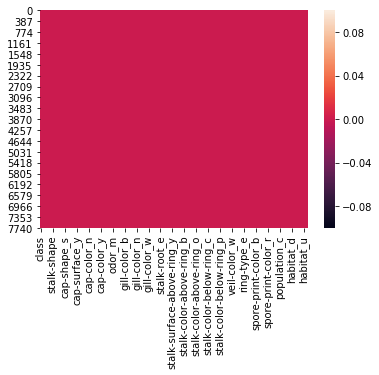

In [65]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [66]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(8124, 112)
(1264, 112)


In [67]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

class              0.071946
bruises            0.342750
gill-attachment   -5.977076
gill-spacing       1.840088
gill-size          0.825797
                     ...   
habitat_l          2.623178
habitat_m          4.986821
habitat_p          2.065641
habitat_u          4.373854
habitat_w          6.273056
Length: 112, dtype: float64

In [68]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [69]:
#Lets Again Check the Skewness
data.skew()

class              0.071946
bruises            0.342750
gill-attachment   -5.977076
gill-spacing       1.840088
gill-size          0.825797
                     ...   
habitat_l          2.623178
habitat_m          4.986821
habitat_p          2.065641
habitat_u          4.373854
habitat_w          6.273056
Length: 112, dtype: float64

In [70]:
dfcor = data.corr()
dfcor

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.000000,-0.501530,0.129200,-0.348387,0.540024,-0.102019,-0.182567,0.023007,0.018526,0.163565,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
bruises,-0.501530,1.000000,0.137359,-0.299473,-0.369596,0.099364,0.115686,0.003803,0.045188,-0.229578,...,0.072997,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507
gill-attachment,0.129200,0.137359,1.000000,0.071489,0.108984,0.186485,-0.122896,0.003615,0.043740,-0.083575,...,0.069399,0.013080,0.084172,0.100905,0.097662,-0.436199,0.031453,0.065947,0.035483,0.025344
gill-spacing,-0.348387,-0.299473,0.071489,1.000000,-0.108333,0.080895,0.039406,0.050573,-0.039154,-0.019591,...,0.347365,-0.308043,-0.226770,-0.217237,0.537841,-0.077632,-0.084739,-0.177670,-0.095595,-0.068279
gill-size,0.540024,-0.369596,0.108984,-0.108333,1.000000,0.214576,-0.148449,0.033174,-0.075766,0.306333,...,-0.119577,0.506475,-0.298685,-0.016064,-0.323808,0.336217,-0.129183,0.170190,0.141152,-0.104090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.155150,-0.278238,-0.436199,-0.077632,0.336217,0.085287,0.010113,0.065707,-0.052326,0.235108,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.138627,0.228986,0.031453,-0.084739,-0.129183,-0.221048,0.374316,-0.004286,-0.129312,-0.065047,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,0.323346,-0.249460,0.065947,-0.177670,0.170190,-0.052059,-0.095178,-0.008985,0.021891,0.090538,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,0.112078,0.143017,0.035483,-0.095595,0.141152,-0.077334,-0.052871,-0.004835,0.030636,-0.073380,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


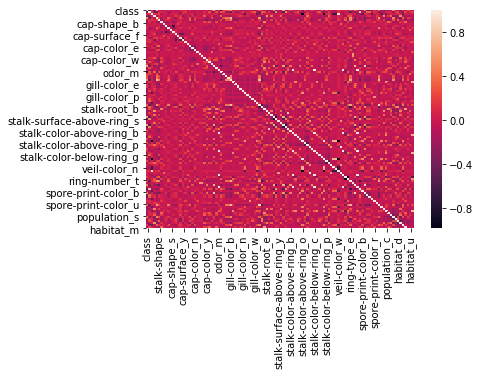

In [71]:
sns.heatmap(dfcor)

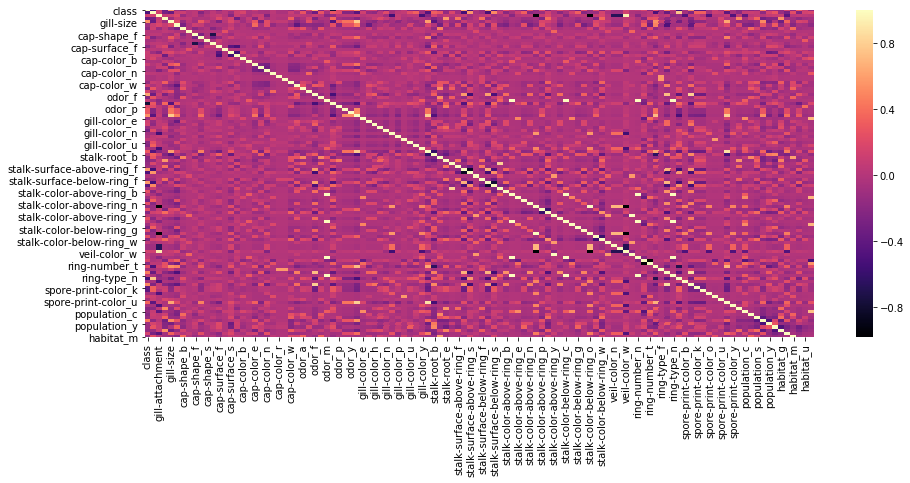

In [72]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='magma',annot=False)

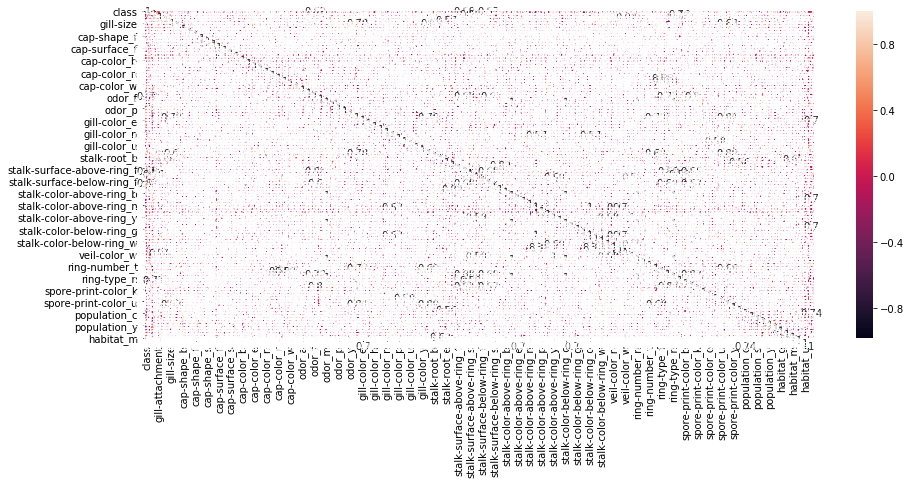

In [73]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,annot=True)

#### Plotting Pairplot through Iteration

### Plotting Boxplot through Iteration

### Plotting Displot Through Iteration

#### Separating X and Y variable

In [74]:
data

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0.000000,0.693147,0,0.000000,0.0,0,0.000000,...,0.693359,0,0.0,0,0.000000,0.000000,0.000000,0.0,0.693359,0.0
1,0,1,1,0.000000,0.000000,0,0.000000,0.0,0,0.000000,...,0.000000,0,0.0,0,0.693359,0.000000,0.000000,0.0,0.000000,0.0
2,0,1,1,0.000000,0.000000,0,0.693359,0.0,0,0.000000,...,0.000000,0,0.0,0,0.000000,0.000000,0.693359,0.0,0.000000,0.0
3,1,1,1,0.000000,0.693147,0,0.000000,0.0,0,0.000000,...,0.693359,0,0.0,0,0.000000,0.000000,0.000000,0.0,0.693359,0.0
4,0,0,1,0.693147,0.000000,1,0.000000,0.0,0,0.000000,...,0.000000,0,0.0,0,0.693359,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0.000000,0.000000,0,0.000000,0.0,0,0.693359,...,0.000000,0,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8120,0,0,0,0.000000,0.000000,0,0.000000,0.0,0,0.000000,...,0.000000,1,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8121,0,0,0,0.000000,0.000000,0,0.000000,0.0,1,0.000000,...,0.000000,0,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8122,1,0,1,0.000000,0.693147,1,0.000000,0.0,0,0.693359,...,0.000000,1,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0


In [75]:
X = data.drop("class", axis=1)


In [76]:
X

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0.000000,0.693147,0,0.000000,0.0,0,0.000000,0.0,...,0.693359,0,0.0,0,0.000000,0.000000,0.000000,0.0,0.693359,0.0
1,1,1,0.000000,0.000000,0,0.000000,0.0,0,0.000000,0.0,...,0.000000,0,0.0,0,0.693359,0.000000,0.000000,0.0,0.000000,0.0
2,1,1,0.000000,0.000000,0,0.693359,0.0,0,0.000000,0.0,...,0.000000,0,0.0,0,0.000000,0.000000,0.693359,0.0,0.000000,0.0
3,1,1,0.000000,0.693147,0,0.000000,0.0,0,0.000000,0.0,...,0.693359,0,0.0,0,0.000000,0.000000,0.000000,0.0,0.693359,0.0
4,0,1,0.693147,0.000000,1,0.000000,0.0,0,0.000000,0.0,...,0.000000,0,0.0,0,0.693359,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0.000000,0.000000,0,0.000000,0.0,0,0.693359,0.0,...,0.000000,0,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8120,0,0,0.000000,0.000000,0,0.000000,0.0,0,0.000000,0.0,...,0.000000,1,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8121,0,0,0.000000,0.000000,0,0.000000,0.0,1,0.000000,0.0,...,0.000000,0,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0
8122,0,1,0.000000,0.693147,1,0.000000,0.0,0,0.693359,0.0,...,0.000000,1,0.0,0,0.000000,0.693359,0.000000,0.0,0.000000,0.0


In [77]:
Y = data["class"]
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [78]:
X.shape

(8124, 111)

In [79]:
Y.shape

(8124,)

In [80]:
Y = Y.values.reshape(-1,1)

In [81]:
Y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [82]:
Y.shape

(8124, 1)

In [83]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [84]:
train_X.shape

(6336, 111)

In [85]:
test_X.shape

(1788, 111)

In [86]:
train_Y.shape

(6336, 1)

In [87]:
test_Y.shape

(1788, 1)

In [88]:
#Applying Logistic Regression
lg=LogisticRegression()

In [89]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=lg.predict(test_X)
print(pred)

[0 1 1 ... 1 0 0]


In [91]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.9994407158836689


In [92]:
print(confusion_matrix(test_Y,pred))

[[942   0]
 [  1 845]]


In [93]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [94]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.9558055518902908


In [95]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.980215800472973


### Grid Search Cross Validation for Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 1.0


In [43]:
lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 1.0


### Boost the Dataset by AdaBoost and GradiantBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

1.0
[0 1 1 ... 1 0 0]


1.0

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

1.0
[0 1 1 ... 1 0 0]


1.0

### Boosting though GradientBoost Regressor By using Parameters

In [96]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))


model_Score: 0.9995352102670639
R2 sq:  0.9995352102670639
Mean squared error: 0.00
Test Variance score: 1.00


### Lets Visualize the Goodness of the Prediction

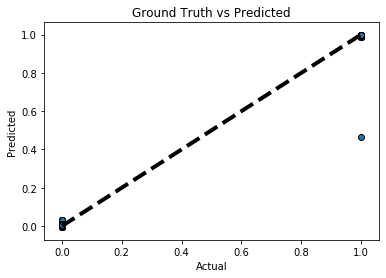

In [98]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [44]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.9546979865771812
[[940   2]
 [ 79 767]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       942
           1       1.00      0.91      0.95       846

    accuracy                           0.95      1788
   macro avg       0.96      0.95      0.95      1788
weighted avg       0.96      0.95      0.95      1788



### Multinomial NB by using Crossval Score

In [46]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.52854512 0.81180812 0.900369   0.99446494 0.99077491 0.98892989
 0.9704797  0.95387454 0.94454713 1.         1.         0.99815157
 0.87985213 0.98151571 0.99075786]
Mean Scores 0.9289380417318026
Standard deviation 0.11917592670917351
Y Prediction values
[0 0 0 ... 1 1 1]


array([[3414,  794],
       [ 595, 3321]], dtype=int64)

### Pediction using Support Vector Machine

In [46]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.9994407158836689
[[942   0]
 [  1 845]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### Support Vector Machine by using Crossval Score

In [47]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.77736777 0.99938462 0.94030769 1.         0.52894089]
Mean Scores 0.8492001936139104
Standard Deviation 0.17962318262746665
Y Prediction values
[0 0 0 ... 1 1 1]


0.8492122107336287

### Use GridSearchCV for Support Vector Machine

In [53]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.515, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.516, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.515, total=   4.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.999, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.999, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   1.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.982, total=   1.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.980, total=   1.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.981, total=   1.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=1.000, total=   4.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=1.000, total=   4.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=1.000, total=   4.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=1.000, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=1.000, total=   1.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=1.000, total=   1.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=1.000, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [54]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [55]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### Boosting through Support Vector Classifier

# Kindly give the Feedback for this algo, this below one is not getting Executed 

### Prediction Using DecisionTreeClassifier

In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

1.0
[[942   0]
 [  0 846]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### DecisionTreeClassifier by using Crossval Score

In [53]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [1.         1.         0.99568519 1.         0.66433897]
Mean Scores 0.9320048315955975
Standard Deviation 0.13384336467114172
Y Prediction values
[1 0 0 ... 0 1 0]


array([[3944,  264],
       [  10, 3906]], dtype=int64)

### Use GridSearchCV for DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   23.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [55]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 14, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [60]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### Boost Decision Tree Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [62]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 1, 1, ..., 1, 0, 0])

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

1.0


In [64]:
confusion_matrix(test_Y, predictions)


array([[942,   0],
       [  0, 846]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [65]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

1.0
[[942   0]
 [  0 846]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### KNN Nearest Neighbor by using Crossval Score 

In [47]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.69126691 1.         1.         1.         1.         1.
 1.         1.         0.88902589 0.99753391]
Mean Scores 0.9577826715381826
Standard Deviation 0.09477047261998728
Y Prediction values
[0 0 0 ... 0 1 0]
y_pred.shape (8124,)


array([[3783,  425],
       [ 241, 3675]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [68]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996845425867509, 0.9996845425867509, 0.9990533785837806, 0.9990533785837806, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561, 0.9988956498771561]


In [69]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [70]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [71]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')


In [72]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [73]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)



{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [74]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### Bagging of KNN Nearest Neighbor 

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [76]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [77]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 1, 1, ..., 1, 0, 0])

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

1.0


In [79]:
confusion_matrix(test_Y, predictions)

array([[942,   0],
       [  0, 846]], dtype=int64)

### Prediction Using RandomForest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

1.0
[[942   0]
 [  0 846]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



### RandomForestClassifier Using Cross_Val_Score

In [49]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.68511685 1.         1.         1.         0.99876999 1.
 1.         1.         1.         1.        ]
Mean Scores 0.968388683886839
Standard Deviation 0.09442465635851138
Y Prediction values
[0 0 0 ... 0 1 1]
y_pred.shape (8124,)


array([[3685,  523],
       [ 230, 3686]], dtype=int64)

### Use GridSearchCV for Random Forest Classifier

In [50]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [51]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [67]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### Bagging of Random Forest Classifier 

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [70]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [71]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([0, 1, 1, ..., 1, 0, 0])

In [72]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

1.0


In [73]:
confusion_matrix(test_Y, predictionsrf)

array([[942,   0],
       [  0, 846]], dtype=int64)

#### NOTE:: All models give good accuracies but I am choosing baggingrf and going to save this model

In [74]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(baggingrf,'Mushroom.pkl')

['Mushroom.pkl']